In [18]:
import pandas as pd
import numpy as np
from collections import namedtuple
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn_evaluation import plot
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
NAVY = "#001f3f"


Data = namedtuple("Data", ['X', 'y'])

In [3]:
def experiment(estimator, preprocessed_trainx,preprocessed_trainy, hyper_parameter_name, hyper_parameter_values, x_axis_label):
    train_scores, valid_scores = validation_curve(estimator,
                                                  preprocessed_trainx,
                                                  preprocessed_trainy,
                                                  hyper_parameter_name,
                                                  hyper_parameter_values,
                                                  cv=4,
                                                  verbose=3,
                                                  n_jobs=-1,
                                                  scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    plt.title("Validation Curve with svm for the Banking Dataset")
    plt.xlabel(x_axis_label)
    plt.ylabel("Accuracy")
    lw = 2

    plt.plot(hyper_parameter_values, train_scores_mean, label="Training Accuracy",
                 color="darkorange", lw=lw)
    plt.fill_between(hyper_parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(hyper_parameter_values, valid_scores_mean, label="Cross-Validation Accuracy",
                 color=NAVY, lw=lw)
    plt.fill_between(hyper_parameter_values, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.2,
                     color=NAVY, lw=lw)
    print("Training Accuracy:", train_scores)
    print("Valid Accuracy:", valid_scores)
    plt.legend(loc="best")
    plt.savefig("banking_" + hyper_parameter_name + "_cv.png", format="png")


def evaluate_generalization(test_dataset, estimator):
    predictions = estimator.predict(test_dataset.X)
    true_labels = test_dataset.y
    accuracy = accuracy_score(true_labels, predictions)
    loss = log_loss(true_labels, predictions)
    ax = plot.confusion_matrix(true_labels, predictions)
    plt.subplot(ax)
    plt.savefig("generalization_confusion_matrix.png", format="png")

    print("Accuracy", accuracy)
    print("Log Loss", loss)
    print(classification_report(true_labels, predictions))

In [4]:
training_data = pd.read_csv('../data/banking/bank-additional-full-transformed-train.csv', sep=';')
scaler=StandardScaler()

In [5]:
X_train, y_train =  training_data.iloc[:, :-1], training_data.iloc[:, -1], 

In [6]:
X_train=scaler.fit_transform(X_train)

In [7]:
test_data = pd.read_csv('../data/banking/bank-additional-full-transformed-test.csv', sep=';')
test_data = Data(X=scaler.transform(test_data.iloc[:, :-1]), y=test_data.iloc[:, -1])

Accuracy 0.8300558387958242
Log Loss 5.869760736719768
             precision    recall  f1-score   support

        0.0       0.94      0.86      0.90      7311
        1.0       0.35      0.57      0.43       927

avg / total       0.87      0.83      0.85      8238



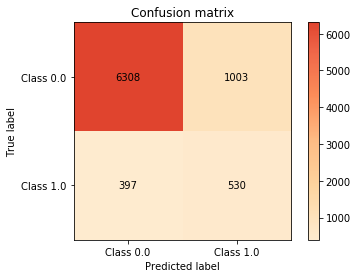

In [10]:
estimator = LinearSVC(C=0.000001)
estimator.fit(np.array(X_train), np.array(y_train))
evaluate_generalization(test_data, estimator)

[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:   28.2s remaining:   52.4s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:   39.9s remaining:   17.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.0min finished


Training Accuracy: [[0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]]
Valid Accuracy: [[0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]]


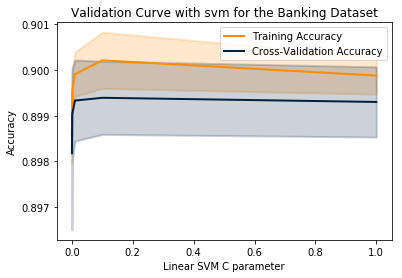

In [14]:
#Validation Curve
C_range = [0.0001,0.001,0.01,0.1,1]
#Experiment 3: linear SVM with search on C.
experiment(LinearSVC(),
           np.array(X_train), np.array(y_train),
           "C",
           C_range,
           "Linear SVM C parameter")

Accuracy 0.9002184996358339
Log Loss 3.446339665013997
             precision    recall  f1-score   support

        0.0       0.91      0.99      0.95      7311
        1.0       0.68      0.21      0.32       927

avg / total       0.88      0.90      0.88      8238



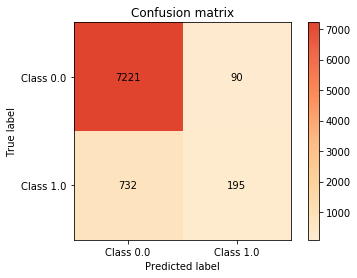

In [15]:
estimator = LinearSVC(C=0.01)
estimator.fit(np.array(X_train), np.array(y_train))
evaluate_generalization(test_data, estimator)